In [1]:
pip install pandas


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Load your data
df = pd.read_csv('/Users/apichet/Downloads/your_outliers.csv')

In [18]:
# Instead of directly assigning, use .loc to avoid SettingWithCopyWarning
non_outliers.loc[:, 'hour'] = non_outliers['Time(UTC)'].dt.hour

/var/folders/6p/zr1pt4fd6q3fpxb61scy6_rm0000gn/T/ipykernel_87592/2408231645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers.loc[:, 'hour'] = non_outliers['Time(UTC)'].dt.hour


In [8]:
# Convert necessary columns to appropriate data types
df['Time(UTC)'] = pd.to_datetime(df['Time(UTC)'])
df['Amount/TokenID'] = pd.to_numeric(df['Amount/TokenID'], errors='coerce')

In [9]:
# Filter data for further analysis
outliers = df[df['is_anomaly'] == -1]
non_outliers = df[df['is_anomaly'] != -1]

In [10]:
# Temporal analysis: Distribution of transactions over time
outliers['hour'] = outliers['Time(UTC)'].dt.hour
non_outliers['hour'] = non_outliers['Time(UTC)'].dt.hour

/var/folders/6p/zr1pt4fd6q3fpxb61scy6_rm0000gn/T/ipykernel_87592/1150713607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['hour'] = outliers['Time(UTC)'].dt.hour
/var/folders/6p/zr1pt4fd6q3fpxb61scy6_rm0000gn/T/ipykernel_87592/1150713607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers['hour'] = non_outliers['Time(UTC)'].dt.hour


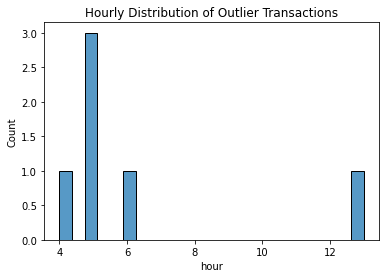

In [23]:
# Visualize the hour of transactions for outliers
sns.histplot(outliers['hour'], kde=False, bins=24)
plt.title('Hourly Distribution of Outlier Transactions')
plt.show()

In [13]:
# Address Analysis: Count transactions by address
address_counts = outliers['From'].value_counts()
print("Frequent 'From' addresses in outliers:")
print(address_counts.head())

Frequent 'From' addresses in outliers:
TBGayuzo4NcLSNJHyaPiJsLn8WNsig18WK    6
Name: From, dtype: int64


In [14]:
# Statistical Test Example: Compare means using a t-test
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(outliers['Amount/TokenID'], non_outliers['Amount/TokenID'], equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: 17.92327677062749, P-value: 9.393744123375754e-06


/var/folders/6p/zr1pt4fd6q3fpxb61scy6_rm0000gn/T/ipykernel_87592/2892155200.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['hour'] = outliers['Time(UTC)'].dt.hour
/var/folders/6p/zr1pt4fd6q3fpxb61scy6_rm0000gn/T/ipykernel_87592/2892155200.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers['hour'] = non_outliers['Time(UTC)'].dt.hour


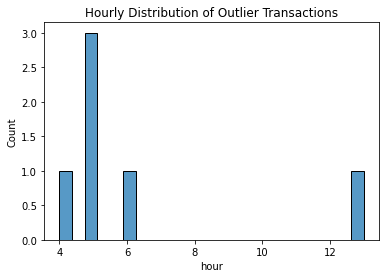

Frequent 'From' addresses in outliers:
TBGayuzo4NcLSNJHyaPiJsLn8WNsig18WK    6
Name: From, dtype: int64
T-statistic: 17.92327677062749, P-value: 9.393744123375754e-06


In [21]:
# Filter data for further analysis
outliers = df[df['is_anomaly'] == -1]
non_outliers = df[df['is_anomaly'] != -1]

# Temporal analysis: Distribution of transactions over time
outliers['hour'] = outliers['Time(UTC)'].dt.hour
non_outliers['hour'] = non_outliers['Time(UTC)'].dt.hour

import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the hour of transactions for outliers
sns.histplot(outliers['hour'], kde=False, bins=24)
plt.title('Hourly Distribution of Outlier Transactions')
plt.show()

# Address Analysis: Count transactions by address
address_counts = outliers['From'].value_counts()
print("Frequent 'From' addresses in outliers:")
print(address_counts.head())

# Statistical Test Example: Compare means using a t-test
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(outliers['Amount/TokenID'], non_outliers['Amount/TokenID'], equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_val}")